# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.42'

### Load in the data

In [2]:
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.436888,1048.898738,0.897797
1,FI2,0.417796,1015.924767,0.831850
2,FI4,0.459045,1041.589916,0.883180
3,FI5,0.493865,1034.935183,0.869870
4,FI7,0.482227,1034.820102,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

### Lets do a silly example first just using a single FI so you can see what its doing
- If you use plot_figure=True, it will plot the resulting distributions. 

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.436888,5.920228,1.568091,1.568147,1.568896,0.068659,5.920440,5.923269,0.259218,50,0,0.0
1,FI2,0.417796,5.382509,1.425665,1.421573,1.419306,0.062902,5.367061,5.358501,0.237484,50,0,0.0
2,FI4,0.459045,6.337844,1.678705,1.678624,1.675718,0.076134,6.337540,6.326568,0.287440,50,0,0.0
3,FI5,0.493865,7.059130,1.869752,1.870720,1.873996,0.085646,7.062785,7.075153,0.323350,50,0,0.0
4,FI7,0.482227,6.798232,1.800648,1.799458,1.799119,0.081881,6.793741,6.792462,0.309137,50,0,0.0


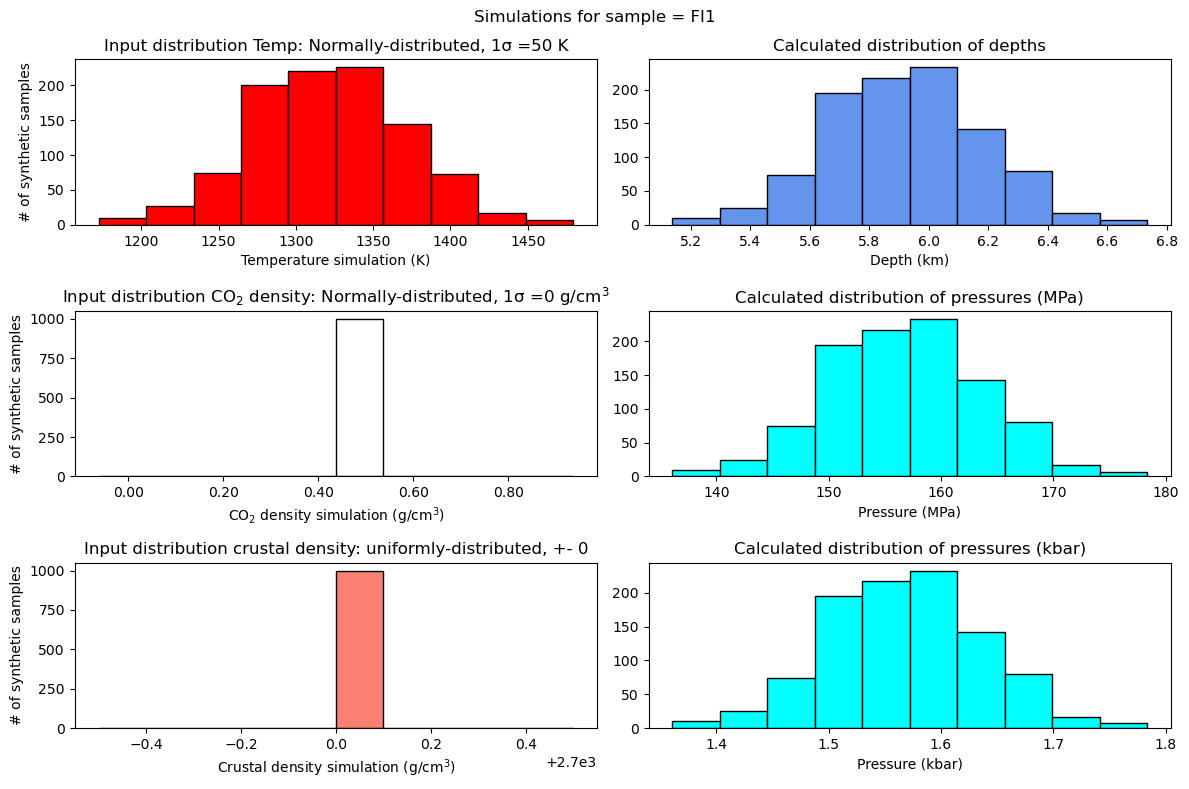

In [3]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

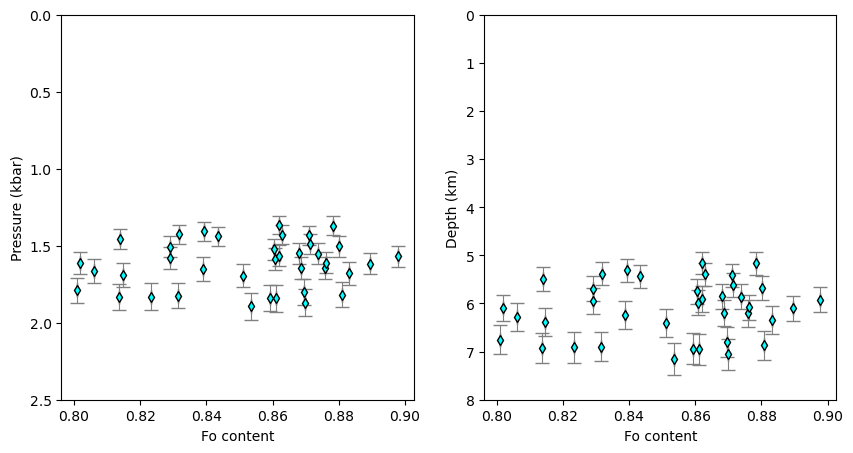

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO$_2$ Density
- Lets say the uncertainty in CO$_2$ density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.436888,5.920228,1.568091,1.572247,1.557410,0.234091,5.935920,5.879902,0.883794,0,10,0.0
1,FI2,0.417796,5.382509,1.425665,1.435987,1.435262,0.208469,5.421480,5.418741,0.787062,0,10,0.0
2,FI4,0.459045,6.337844,1.678705,1.688950,1.673205,0.265138,6.376523,6.317080,1.001010,0,10,0.0
3,FI5,0.493865,7.059130,1.869752,1.877171,1.856256,0.304538,7.087141,7.008178,1.149763,0,10,0.0
4,FI7,0.482227,6.798232,1.800648,1.828660,1.813891,0.283673,6.903990,6.848230,1.070988,0,10,0.0


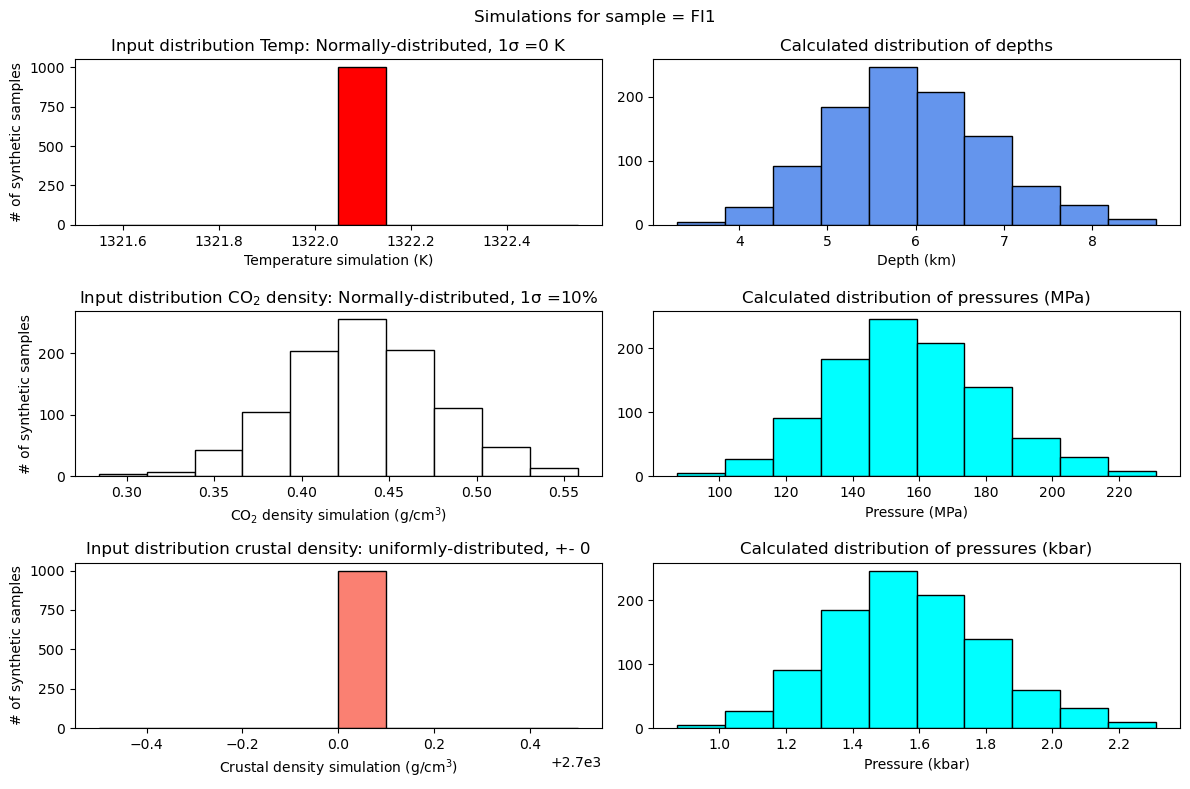

In [5]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.436888,5.920228,1.568091,1.569922,1.569287,0.113188,5.927140,5.924743,0.427334,30,0.02,0.0
1,FI2,0.417796,5.382509,1.425665,1.434381,1.429213,0.110156,5.415417,5.395903,0.415885,30,0.02,0.0
2,FI4,0.459045,6.337844,1.678705,1.682350,1.678543,0.119330,6.351605,6.337232,0.450521,30,0.02,0.0
3,FI5,0.493865,7.059130,1.869752,1.868840,1.867477,0.132481,7.055689,7.050541,0.500173,30,0.02,0.0
4,FI7,0.482227,6.798232,1.800648,1.802706,1.796780,0.127189,6.806002,6.783629,0.480195,30,0.02,0.0


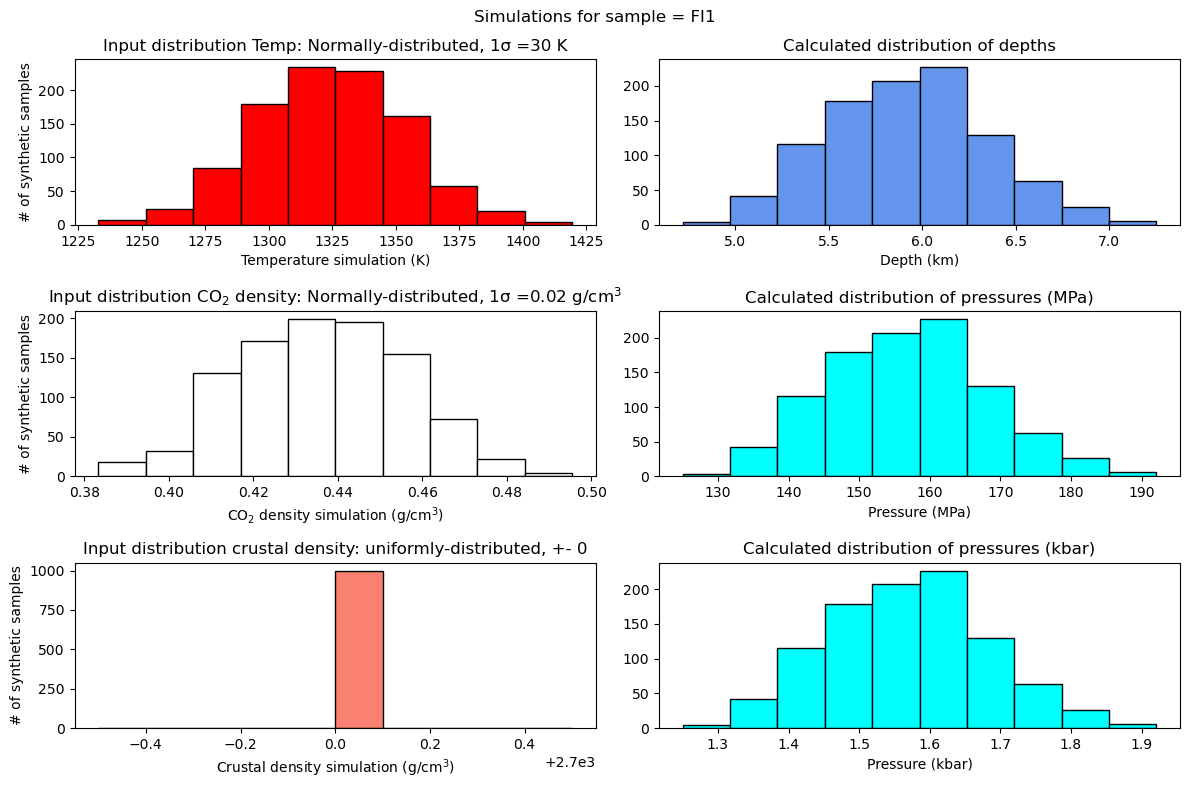

In [6]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.loop_all_FI_MC(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_density_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO$_2$ and Crustal density
- Here we also add a 5% uncertainty in crustal density.

working on sample number 0
working on sample number 20


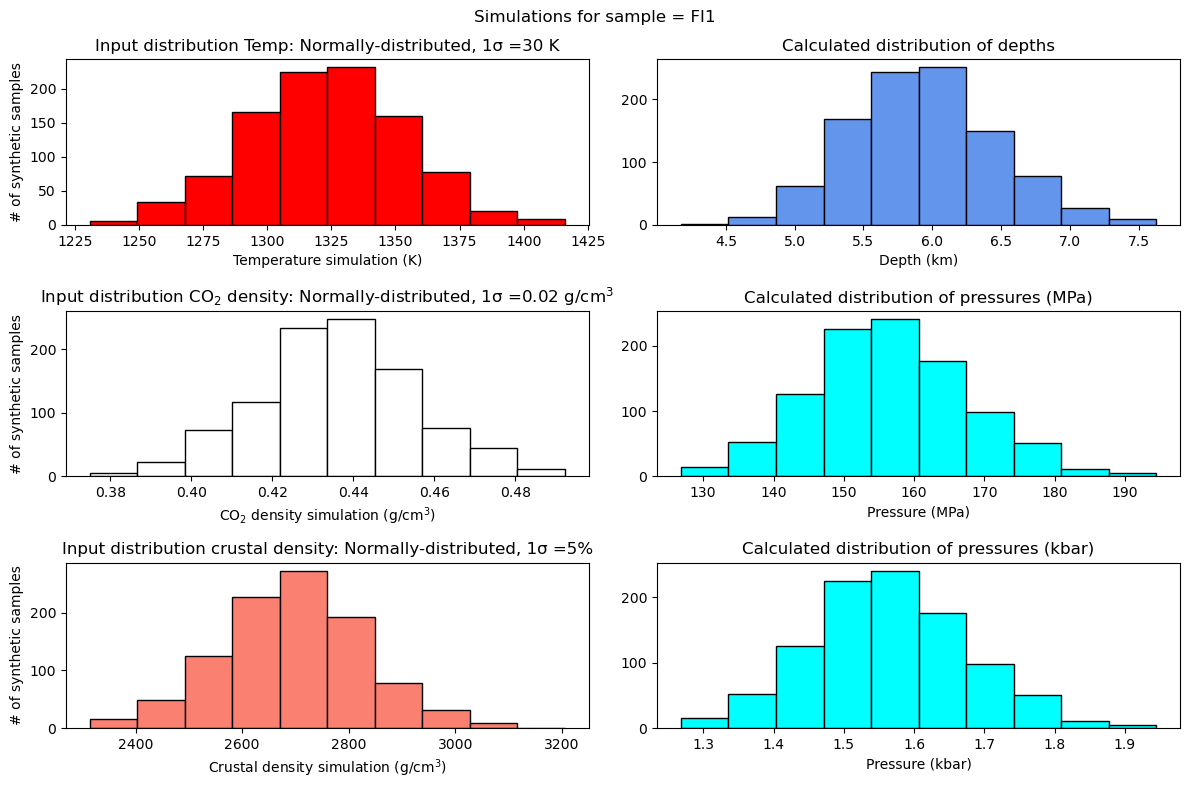

In [7]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_density_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CD.head()

fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [10]:
MC_All_rho_T_CD.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,T_K,MC_CO2_dens_gcm3
0,FI1,1.745272,174.527165,6.040678,2945.156215,1334.163616,0.465637
1,FI1,1.481153,148.115300,5.888998,2563.831473,1309.178467,0.423599
2,FI1,1.477774,147.777421,5.899502,2553.428459,1287.525687,0.428562
3,FI1,1.488932,148.893231,5.798736,2617.415016,1299.783764,0.427538
4,FI1,1.651931,165.193051,6.374835,2641.519291,1339.676831,0.447726


In [9]:
MC_Av_rho_T_CD

,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.436888,5.920228,1.568091,1.566311,1.561101,0.111547,5.933128,5.923802,0.520378,30,0.02,135.0
1,FI2,0.417796,5.382509,1.425665,1.427847,1.420358,0.105647,5.416580,5.374770,0.480109,30,0.02,135.0
2,FI4,0.459045,6.337844,1.678705,1.679325,1.670691,0.122355,6.353781,6.306090,0.562820,30,0.02,135.0
3,FI5,0.493865,7.059130,1.869752,1.875902,1.872850,0.131856,7.092787,7.100395,0.604542,30,0.02,135.0
4,FI7,0.482227,6.798232,1.800648,1.808609,1.809259,0.124593,6.838609,6.824708,0.584500,30,0.02,135.0
5,FI9,0.490442,6.954312,1.841989,1.842305,1.840959,0.129827,6.976521,6.958331,0.604052,30,0.02,135.0
6,FI11,0.453781,6.207481,1.644175,1.650676,1.649430,0.118562,6.236803,6.224628,0.545186,30,0.02,135.0
7,FI13,0.491932,6.895131,1.826313,1.827402,1.823378,0.125898,6.929822,6.899195,0.587336,30,0.02,135.0
8,FI15,0.444918,5.985014,1.585251,1.590919,1.586469,0.120929,6.026260,5.992311,0.558574,30,0.02,135.0
9,FI17,0.496043,6.929894,1.835521,1.834044,1.831648,0.123594,6.938336,6.920162,0.584851,30,0.02,135.0


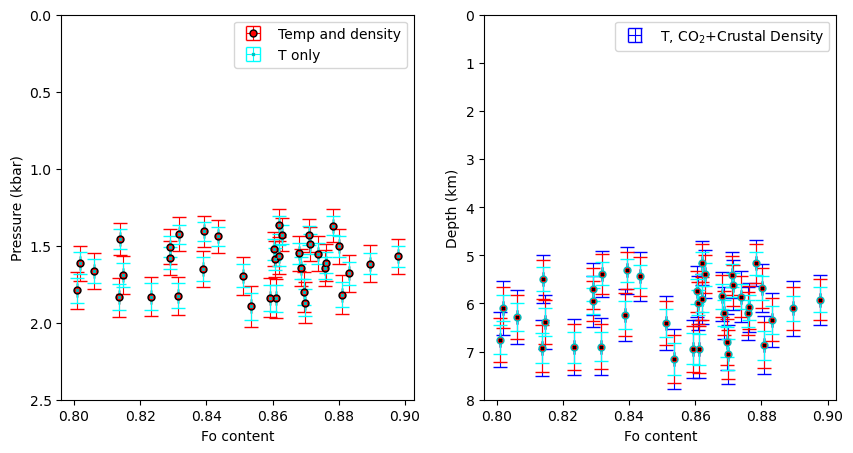

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T_CD['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T_CD['std_dev_MC_D_km'],
             fmt='o', ecolor='b', elinewidth=0.8, mfc='b', ms=0, mec='b', capsize=5,
            label='T, CO$_2$+Crustal Density')
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_P_kbar'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=5,
             label='Temp and density')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_D_km'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='c', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='c', capsize=5,
            label='T only')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax1.legend()
ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()